In [4]:
import scanpy as sc
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import logging
from scipy.sparse import issparse
import anndata as adt
import celltypist
from celltypist import models
import scvi
import pandas as pd

In [2]:
#%pip install celltypist scvi-tools hyperopt ray[tune] 

In [3]:
#%pip install --user scikit-misc

In [4]:
models.get_all_models()

['Adult_COVID19_PBMC.pkl',
 'Adult_CynomolgusMacaque_Hippocampus.pkl',
 'Adult_Human_MTG.pkl',
 'Adult_Human_PancreaticIslet.pkl',
 'Adult_Human_PrefrontalCortex.pkl',
 'Adult_Human_Skin.pkl',
 'Adult_Human_Vascular.pkl',
 'Adult_Mouse_Gut.pkl',
 'Adult_Mouse_OlfactoryBulb.pkl',
 'Adult_Pig_Hippocampus.pkl',
 'Adult_RhesusMacaque_Hippocampus.pkl',
 'Autopsy_COVID19_Lung.pkl',
 'Cells_Adult_Breast.pkl',
 'Cells_Fetal_Lung.pkl',
 'Cells_Human_Tonsil.pkl',
 'Cells_Intestinal_Tract.pkl',
 'Cells_Lung_Airway.pkl',
 'COVID19_HumanChallenge_Blood.pkl',
 'COVID19_Immune_Landscape.pkl',
 'Developing_Human_Brain.pkl',
 'Developing_Human_Gonads.pkl',
 'Developing_Human_Hippocampus.pkl',
 'Developing_Human_Organs.pkl',
 'Developing_Human_Thymus.pkl',
 'Developing_Mouse_Brain.pkl',
 'Developing_Mouse_Hippocampus.pkl',
 'Fetal_Human_AdrenalGlands.pkl',
 'Fetal_Human_Pancreas.pkl',
 'Fetal_Human_Pituitary.pkl',
 'Fetal_Human_Retina.pkl',
 'Fetal_Human_Skin.pkl',
 'Healthy_Adult_Heart.pkl',
 'Healthy_

In [5]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [6]:
path_dir_folder_processed_data = 'G:\Data processing pipeline 0.1 Yohan\scRNA\Output\processed_data'

In [7]:
adatas = [sc.read_h5ad(path_dir_folder_processed_data + '/' + x) for x in os.listdir(path_dir_folder_processed_data)]

In [8]:
adatas[0]

AnnData object with n_obs × n_vars = 7142 × 18087
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score_scDbFinder', 'doublet_class_scDbFinder', 'doublet_dbd', 'doublet_score_dbd'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cells_removed', 'doublets_removed_dbd'

In [8]:
# i used models in celltypist :Human_Lung_Atlas & Cells_Lung_Airway

# Query dataset preparation and model training

## Preprocessing query

#### Selection normal cells

In [3]:
file_loc = "G:/Data processing pipeline 0.1 Yohan/scRNA/Gene ref data/dataset_annot_scRNA_raw.h5ad"

In [4]:
query = sc.read_h5ad(file_loc)

In [5]:
query.obs['disease'].value_counts()

disease
normal                                   1305099
COVID-19                                  341761
pulmonary fibrosis                        268932
interstitial lung disease                  68456
chronic obstructive pulmonary disease      67943
lung adenocarcinoma                        62807
pneumonia                                  31923
chronic rhinitis                           29137
lung large cell carcinoma                  21167
squamous cell lung carcinoma               20631
cystic fibrosis                            17590
lymphangioleiomyomatosis                   12374
pleomorphic carcinoma                      10765
hypersensitivity pneumonitis               10379
non-specific interstitial pneumonia         8597
pulmonary sarcoidosis                       4886
Name: count, dtype: int64

In [8]:
query[query.obs.disease == 'normal'].obs

,suspension_type,donor_id,is_primary_data,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,tissue_ontology_term_id,organism_ontology_term_id,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
CGATGTAAGTTACGGG_SC10,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009899,CL:0000583,HsapDv:0000149,PATO:0000461,HANCESTRO:0008,UBERON:0008946,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 3' v2,normal,Homo sapiens,male,lung parenchyma,Asian,55-year-old stage,LL;0n*@mx8
cc05p_CATGCCTGTGTGCCTG_carraro_csmc,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009899,unknown,unknown,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,unknown,10x 3' v2,normal,Homo sapiens,unknown,lung,unknown,unknown,)rNf~Q0&BX
ATTCTACCAAGGTTCT_HD68,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0011025,CL:0002144,HsapDv:0000135,PATO:0000461,HANCESTRO:0005,UBERON:0008946,NCBITaxon:9606,...,tissue,capillary endothelial cell,10x 5' v1,normal,Homo sapiens,male,lung parenchyma,European,41-year-old stage,5%kv|ie@!5
D062_TGACCCTTCAAACCCA-sub_wang_sub_batch3,nucleus,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0009922,CL:4028004,HsapDv:0000262,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,alveolar type 1 fibroblast cell,10x 3' v3,normal,Homo sapiens,male,lung,unknown,newborn stage (0-28 days),Jq?*-$kHDp
P1_2_TGCTGCTAGCTCCTCT,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0009899,CL:0000583,HsapDv:0000169,PATO:0000461,HANCESTRO:0005,UBERON:0008946,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 3' v2,normal,Homo sapiens,male,lung parenchyma,European,75-year-old stage,Vf*$A^fe9?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_4_GCTTGAACACGACGAA,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0009899,CL:0009089,HsapDv:0000145,PATO:0000461,unknown,UBERON:0001005,NCBITaxon:9606,...,tissue,lung pericyte,10x 3' v2,normal,Homo sapiens,female,respiratory airway,unknown,51-year-old stage,=%nVC9Pi6~
TTGTGGATCGTTCCTG_5-PX5-sub_mould,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009922,CL:0000583,unknown,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 3' v3,normal,Homo sapiens,unknown,lung,unknown,unknown,1Y~Wo08=%L
TCAGGATCAAGACGTG_F02526,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0011025,CL:0002145,HsapDv:0000149,PATO:0000461,HANCESTRO:0010,UBERON:0008946,NCBITaxon:9606,...,tissue,ciliated columnar cell of tracheobronchial tree,10x 5' v1,normal,Homo sapiens,male,lung parenchyma,African,55-year-old stage,APnAX3m%#T
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0011025,CL:0000583,HsapDv:0000158,PATO:0000461,HANCESTRO:0005,UBERON:0002048,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 5' v1,normal,Homo sapiens,male,lung,European,64-year-old stage,5~yXPx7fAJ


In [6]:
query = query[query.obs.disease == 'normal']

In [8]:
query.write('G:/Data processing pipeline 0.1 Yohan/scRNA/Gene ref data/query_healthy_cells.h5ad')

#### Verification raw counts & keep only raw data

In [3]:
query = sc.read_h5ad('G:/Data processing pipeline 0.1 Yohan/scRNA/Gene ref data/query_healthy_cells.h5ad')

In [6]:
def rmve(query):

    remove = [
        'is_primary_data', 'assay_ontology_term_id',
        'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 
        'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
        'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 
        'BMI', 'age_or_mean_of_age_range', 'age_range', 'cause_of_death', 'fresh_or_frozen',
         'lung_condition', 
        'mixed_ancestry', 
        'smoking_status',  'tissue_dissociation_protocol', 'tissue_level_2', 
        'tissue_level_3', 'tissue_sampling_method', 'tissue_type',  'assay',  'organism',
        'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid',
    
        'suspension_type', 'anatomical_region_ccf_score', 
         'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3',
        'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 
        'entropy_subject_ID_leiden_3', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 
         'original_ann_highest_res', 'original_ann_level_1', 
        'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5',
        'original_ann_nonharmonized', 'reannotation_type', 'reference_genome', 'sample',
        'sequencing_platform', 'size_factors', 'subject_type', 'size_factors', 'sample'
    ]

    query.obs = query.obs[[x for x in query.obs.columns if x not in remove]]
    return query

In [13]:
query = rmve(query)

In [8]:
def qc(adata):
    sc.pp.filter_cells(adata, min_genes = 200)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith("RPS", "RPL")
    adata.var["hb"] = adata.var_names.str.startswith("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(adata,qc_vars=["mt","ribo","hb"], inplace = True, percent_top = [20], log1p=True)

    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo',
              'log1p_total_counts_ribo','total_counts_hb','log1p_total_counts_hb']

    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    return adata

In [7]:
query_raw = adt.AnnData(X=query.raw.X, obs=query.obs, var=query.raw.var)

In [10]:
query_raw = qc(query_raw)

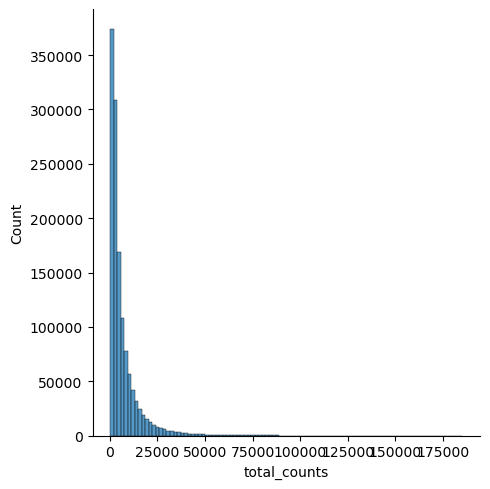

In [11]:
p1 = sns.displot(query_raw.obs["total_counts"], bins=100, kde=False)

In [12]:
query_raw

AnnData object with n_obs × n_vars = 1302742 × 56239
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 

In [13]:
query_raw.write('G:/Data processing pipeline 0.1 Yohan/scRNA/Gene ref data/query_raw_healthy_cells.h5ad')

## Download models celltypist

In [9]:
query_celltypist1 = models.Model.load(model='Human_Lung_Atlas.pkl')

In [10]:
query_celltypist1.features

array(['TSPAN6', 'FGR', 'CFH', ..., 'LINC00891', 'LL22NC03-N95F10.1',
       'RP1-34B20.21'], dtype=object)

In [11]:
query_celltypist2 = models.Model.load(model='Cells_Lung_Airway.pkl')

In [12]:
query_celltypist2.cell_types

array(['AT1 ', 'AT2', 'B_memory', 'B_naive', 'B_plasma_IgA',
       'B_plasma_IgG', 'B_plasmablast', 'Basal', 'CD4_EM/Effector',
       'CD4_TRM', 'CD4_naive/CM', 'CD8_EM', 'CD8_EM/EMRA', 'CD8_TRM',
       'CD8_TRM/EM', 'Chondrocyte', 'Ciliated', 'DC_1', 'DC_2',
       'DC_activated', 'DC_plasmacytoid', 'Deuterosomal', 'Dividing_AT2',
       'Dividing_Basal', 'Endothelia_Lymphatic',
       'Endothelia_vascular_Cap_a', 'Endothelia_vascular_Cap_g',
       'Endothelia_vascular_arterial_pulmonary',
       'Endothelia_vascular_arterial_systemic',
       'Endothelia_vascular_venous_pulmonary',
       'Endothelia_vascular_venous_systemic', 'Erythrocyte',
       'Fibro_adventitial', 'Fibro_alveolar', 'Fibro_immune_recruiting',
       'Fibro_myofibroblast', 'Fibro_peribronchial', 'ILC',
       'Ionocyte_n_Brush', 'MAIT', 'Macro_AW_CX3CR1', 'Macro_CCL',
       'Macro_CHIT1', 'Macro_alveolar', 'Macro_alveolar_metallothioneins',
       'Macro_dividing', 'Macro_intermediate', 'Macro_interstitial',


## Model training

### Query HLA

In [18]:
#crashed, i have to segment it but not necessary because used in Human_Lung_Atlas as model(same doi)

In [19]:
query.obs.groupby('cell_type').size()

cell_type
hematopoietic stem cell                               60
fibroblast                                           276
mesothelial cell                                     230
T cell                                               500
mast cell                                           6623
club cell                                          36023
myofibroblast cell                                   716
smooth muscle cell                                   556
B cell                                              4511
serous secreting cell                               1472
mucus secreting cell                                 537
dendritic cell                                       312
stromal cell                                         335
alveolar macrophage                                78816
acinar cell                                         1274
natural killer cell                                16978
CD4-positive, alpha-beta T cell                    21285
CD8-positive, alpha-b

In [20]:
sc.pp.filter_genes(query, min_cells = 10)

In [21]:
sc.pp.normalize_total(query, target_sum = 1e4)
sc.pp.log1p(query)

In [22]:
query = query[~query.obs.cell_type.isna()]

In [ ]:
ref_model = celltypist.train(query, labels = 'cell_type', n_jobs = 22,
                            use_SGD = False,
                            feature_selection = True, top_genes = 300)


🍳 Preparing data before training


In [ ]:
path_model = 'G:\Data processing pipeline 0.1 Yohan\scRNA\Output\ref_models'

In [ ]:
ref_model.write(path_model + '/' + 'ref.pkl')

In [ ]:
# the former part is useless i don't need it and i should erase it

## Download ref models

In [13]:
#ref_model = models.Model.load(model="ref.pkl")
ref_model_celltypist1 = models.Model.load(model="Cells_Lung_Airway.pkl")
ref_model_celltypist2 = models.Model.load(model="Human_Lung_Atlas.pkl")

# Prediction cell type using celltypist method 

In [14]:
def predict_cells(adata):
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.normalize_total(adata, target_sum=1e4) #maybe modify it
    sc.pp.log1p(adata)

    adata.X = adata.X.toarray()

    #predictions = celltypist.annotate(adata, model=ref_model, majority_voting=False)
    #predictions_adata = predictions.to_adata()
    #adata.obs["ref_model_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
    #adata.obs["ref_model_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]

    predictions = celltypist.annotate(adata, model=query_celltypist1, majority_voting=False)
    predictions_adata = predictions.to_adata()
    adata.obs["ref_model_celltypist1_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
    adata.obs["ref_model_celltypist1_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]

    predictions = celltypist.annotate(adata, model=query_celltypist2, majority_voting=False)
    predictions_adata = predictions.to_adata()
    adata.obs["ref_model_celltypist2_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
    adata.obs["ref_model_celltypist2_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]
    
    return adata.obs

In [15]:
predictions = [predict_cells(ad.copy()) for ad in adatas]

🔬 Input data has 7142 cells and 14213 genes
🔗 Matching reference genes in the model
🧬 3865 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 7142 cells and 14213 genes
🔗 Matching reference genes in the model
🧬 4002 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 6007 cells and 13998 genes
🔗 Matching reference genes in the model
🧬 3798 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 6007 cells and 13998 genes
🔗 Matching reference genes in the model
🧬 3936 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 6753 cells and 14001 genes
🔗 Matching reference genes in the model
🧬 3786 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 6753 cells and 14001 genes
🔗 Matching reference genes in the model
🧬 3923

In [16]:
predictions = pd.concat(predictions)[['ref_model_celltypist1_label', 'ref_model_celltypist1_score',
                                      'ref_model_celltypist2_label', 'ref_model_celltypist2_score']]

predictions

,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Goblet (nasal),0.319114,Secretory_Goblet,0.999951
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Goblet (nasal),0.951831,Secretory_Goblet,0.999886
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Goblet (nasal),0.824988,Secretory_Goblet,0.999993
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Goblet (nasal),0.357202,Secretory_Goblet,0.999483
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Goblet (nasal),0.602141,Secretory_Goblet,0.999654
...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6,AT2,0.055499,Secretory_Goblet,0.987707
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6,Goblet (nasal),0.080242,Secretory_Goblet,0.998898
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Goblet (nasal),0.997562,Secretory_Goblet,1.000000
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Goblet (nasal),0.996979,Secretory_Goblet,0.999873


In [ ]:
#reindexing in order to concatenat correctly the datas

In [28]:
adatas[0].var

,gene_ids,feature_types,genome,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
SAMD11,ENSG00000187634,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,9,0.000818,0.000818,99.918159,9.0,2.302585
NOC2L,ENSG00000188976,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,5323,0.807675,0.592041,51.595890,8882.0,9.091894
KLHL17,ENSG00000187961,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,891,0.088570,0.084865,91.897790,974.0,6.882438
PLEKHN1,ENSG00000187583,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,2216,0.305174,0.266336,79.849050,3356.0,8.118803
PERM1,ENSG00000187642,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,59,0.005729,0.005712,99.463490,63.0,4.158883
...,...,...,...,...,...,...,...,...,...,...,...,...
EGFP,EGFP,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,237,0.733746,0.550284,97.844867,8069.0,8.995909
REPLI,REPLI,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,392,0.503683,0.407917,96.435391,5539.0,8.619750
GLYCO,GLYCO,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,371,0.860144,0.620654,96.626353,9459.0,9.154828
MEMB,MEMB,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,647,2.885332,1.357208,94.116577,31730.0,10.365049


In [35]:
def reindexing(adata):
    
    adata.var = adata.var.reset_index()
    adata.var = adata.var.rename(columns={'index': 'gene_names'})
    adata.var = adata.var.set_index('gene_ids')
    adata.var = adata.var.rename_axis(None)

    return adata

In [36]:
adatas = [reindexing(ad) for ad in adatas]

In [49]:
adatas[2].var

,gene_names,feature_types,genome,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000187634,SAMD11,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,5,0.000474,0.000474,99.952571,5.0,1.791759
ENSG00000188976,NOC2L,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,4223,0.592961,0.465595,59.941188,6251.0,8.740657
ENSG00000187961,KLHL17,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,719,0.072946,0.070408,93.179662,769.0,6.646390
ENSG00000187583,PLEKHN1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,1400,0.190571,0.174433,86.719788,2009.0,7.605890
ENSG00000187642,PERM1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,73,0.007873,0.007842,99.307532,83.0,4.430817
...,...,...,...,...,...,...,...,...,...,...,...,...
EGFP,EGFP,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,8,0.000759,0.000759,99.924113,8.0,2.197225
REPLI,REPLI,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,1,0.000095,0.000095,99.990514,1.0,0.693147
GLYCO,GLYCO,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,6,0.000569,0.000569,99.943085,6.0,1.945910
MEMB,MEMB,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,14,0.001423,0.001422,99.867198,15.0,2.772589


In [55]:
adata = adt.concat(adatas, join="outer", index_unique="-", merge="unique")

In [56]:
adata.var

,gene_names,feature_types,genome,mt,ribo,hb
ENSG00000187634,SAMD11,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False
ENSG00000188976,NOC2L,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False
ENSG00000187961,KLHL17,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False
ENSG00000187583,PLEKHN1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False
ENSG00000187642,PERM1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False
...,...,...,...,...,...,...
EGFP,EGFP,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False
REPLI,REPLI,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False
GLYCO,GLYCO,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False
MEMB,MEMB,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False


In [57]:
def qc(adata):
    sc.pp.filter_cells(adata, min_genes = 200)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith("RPS", "RPL")
    adata.var["hb"] = adata.var_names.str.startswith("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(adata,qc_vars=["mt","ribo","hb"], inplace = True, percent_top = [20], log1p=True)

    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo',
              'log1p_total_counts_ribo','total_counts_hb','log1p_total_counts_hb']

    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    return adata

In [58]:
adata = qc(adata)

In [61]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet_score_scDbFinder,doublet_class_scDbFinder,doublet_dbd,doublet_score_dbd
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,0.0,0.0,0.001438,singlet,0.0,9.467655e-15
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,0.0,0.0,0.004471,singlet,0.0,4.596916e-13
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,0.0,0.0,0.175868,singlet,0.0,8.579486e-03
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,0.0,0.0,0.001208,singlet,0.0,2.458157e-06
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,0.0,0.0,0.001120,singlet,0.0,3.945921e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5428,5428,8.599510,17390.0,9.763708,15.043128,0.0,0.0,0.0,0.000336,singlet,0.0,3.440510e-11
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,6077,6077,8.712431,21812.0,9.990261,18.732808,0.0,0.0,0.0,0.001675,singlet,1.0,7.328824e+01
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,0.0,0.0,0.184157,singlet,0.0,1.199975e+00
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,0.0,0.0,0.064821,singlet,0.0,1.128238e-06


In [62]:
os.makedirs('G:\Data processing pipeline 0.1 Yohan\scRNA\Output\cvs_prediction', exist_ok = True)

In [63]:
path_csv ='G:\Data processing pipeline 0.1 Yohan\scRNA\Output\cvs_prediction'

In [64]:
predictions.to_csv(path_csv + '/PREDICTIONS.csv')

In [65]:
os.makedirs('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/adata_post_celltypist', exist_ok = True)

In [66]:
file_path = os.path.join('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/adata_post_celltypist', f'adata_concat_post_celltypist.h5ad')
adata.write(file_path)

# scVI label transfering

In [ ]:
#warning : restart kernel to free RAM

In [36]:
adata = sc.read_h5ad('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/adata_post_celltypist/adata_concat_post_celltypist.h5ad')

In [37]:
adata

AnnData object with n_obs × n_vars = 25300 × 18087
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score_scDbFinder', 'doublet_class_scDbFinder', 'doublet_dbd', 'doublet_score_dbd'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [6]:
query = sc.read_h5ad('G:/Data processing pipeline 0.1 Yohan/scRNA/Gene ref data/query_raw_healthy_cells.h5ad')

In [7]:
adata.obs['cell_type'] = 'Unknown'
adata.obs['Batch'] = 'Gaia_exp'

In [8]:
sc.pp.filter_genes(query, min_cells = 10)

In [9]:
query.obs['Batch'] = 'query'
query.obs['Id'] = query.obs.donor_id

In [10]:
#query_subset = sc.pp.subsample(query, fraction = 0.25, copy=True)

In [11]:
#query_subset.obs['Batch'] = 'query'
#query_subset.obs['Id'] = query_subset.obs.donor_id

In [12]:
adata.var

,gene_names,feature_types,genome,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000187634,SAMD11,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,15,0.000593,0.000593,99.940711,15.0,2.772589
ENSG00000188976,NOC2L,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,10296,0.594585,0.466614,59.304348,15043.0,9.618734
ENSG00000187961,KLHL17,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,1725,0.073518,0.070941,93.181818,1860.0,7.528869
ENSG00000187583,PLEKHN1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,3808,0.227510,0.204988,84.948617,5756.0,8.658172
ENSG00000187642,PERM1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,157,0.006838,0.006815,99.379447,173.0,5.159055
...,...,...,...,...,...,...,...,...,...,...,...,...
EGFP,EGFP,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,190,0.040356,0.039563,99.249012,1021.0,6.929517
REPLI,REPLI,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,317,0.068142,0.065921,98.747036,1724.0,7.452982
GLYCO,GLYCO,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,308,0.073834,0.071235,98.782609,1868.0,7.533159
MEMB,MEMB,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,524,0.128103,0.120537,97.928854,3241.0,8.083945


In [13]:
dater = sc.concat((adata, query))

In [28]:
dater.obs

,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,cell_type,Batch,_scvi_batch,_scvi_labels
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3-0,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,0.0,0.0,Unknown,Gaia_exp,0,51
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3-0,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,0.0,0.0,Unknown,Gaia_exp,0,51
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3-0,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,0.0,0.0,Unknown,Gaia_exp,0,51
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3-0,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,0.0,0.0,Unknown,Gaia_exp,0,51
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3-0,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,0.0,0.0,Unknown,Gaia_exp,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_4_GCTTGAACACGACGAA,homosapiens_None_2023_None_sikkemalisa_002_d10...,1268,1268,7.145984,2209.0,7.700748,19.873246,0.0,0.0,0.0,lung pericyte,query,1,28
TTGTGGATCGTTCCTG_5-PX5-sub_mould,homosapiens_None_2023_None_sikkemalisa_002_d10...,5559,5559,8.623353,37883.0,10.542284,25.589314,0.0,0.0,0.0,alveolar macrophage,query,1,8
TCAGGATCAAGACGTG_F02526,homosapiens_None_2023_None_sikkemalisa_002_d10...,2800,2800,7.937732,7523.0,8.925853,14.382560,0.0,0.0,0.0,ciliated columnar cell of tracheobronchial tree,query,1,14
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl,homosapiens_None_2023_None_sikkemalisa_002_d10...,1542,1542,7.341484,4219.0,8.347590,25.171842,0.0,0.0,0.0,alveolar macrophage,query,1,8


In [15]:
# ne fonctionne pas tant que pas les raws counts

In [16]:
sc.pp.highly_variable_genes(dater, flavor = 'seurat_v3', n_top_genes=2000, batch_key="Batch", subset = True)

In [27]:
dater

AnnData object with n_obs × n_vars = 1328042 × 2000
    obs: 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'cell_type', 'Batch', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_categorical_covs'

In [18]:
scvi.model.SCVI.setup_anndata(dater, batch_key='Batch', categorical_covariate_keys = ['Id'])
vae = scvi.model.SCVI(dater)
vae.train()

Unable to initialize backend 'cuda': 
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': UNIMPLEMENTED: LoadPjrtPlugin is not implemented on windows yet.
INFO: GPU available: True (cuda), used: True
GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 6/6: 100%|████████████████████| 6/6 [13:06<00:00, 130.70s/it, v_num=1, train_loss_step=391, train_loss_epoch=437]

INFO: `Trainer.fit` stopped: `max_epochs=6` reached.
`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 6/6: 100%|████████████████████| 6/6 [13:06<00:00, 131.09s/it, v_num=1, train_loss_step=391, train_loss_epoch=437]


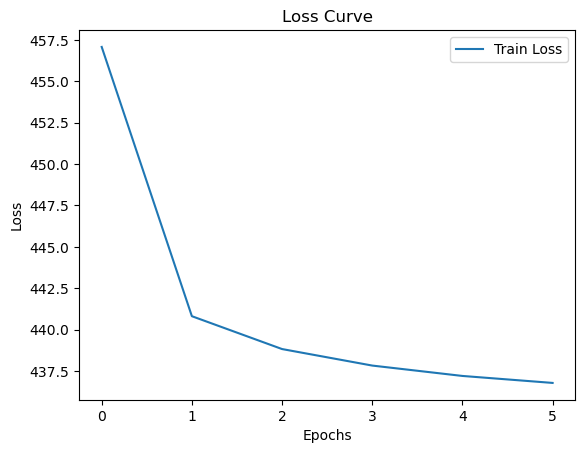

In [23]:
plt.plot(vae.history["reconstruction_loss_train"], label="Train Loss")
#plt.plot(vae.history["reconstruction_loss_validation"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

In [24]:
#print(vae.history.keys())


In [44]:
lvae = scvi.model.SCANVI.from_scvi_model(vae, adata = dater, unlabeled_category = 'Unknown',
                                        labels_key = 'cell_type')

lvae.train(max_epochs=25, n_samples_per_label=400, train_size=0.7, check_val_every_n_epoch=1)

INFO     Training for 25 epochs.                                                                                   


INFO: GPU available: True (cuda), used: True
GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 25/25: 100%|██████████████| 25/25 [2:23:12<00:00, 343.97s/it, v_num=1, train_loss_step=426, train_loss_epoch=436]

INFO: `Trainer.fit` stopped: `max_epochs=25` reached.
`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 25/25: 100%|██████████████| 25/25 [2:23:12<00:00, 343.68s/it, v_num=1, train_loss_step=426, train_loss_epoch=436]


In [45]:
print(lvae.history.keys())

dict_keys(['train_loss_step', 'validation_loss', 'elbo_validation', 'reconstruction_loss_validation', 'kl_local_validation', 'kl_global_validation', 'validation_classification_loss', 'validation_accuracy', 'validation_f1_score', 'validation_calibration_error', 'train_loss_epoch', 'elbo_train', 'reconstruction_loss_train', 'kl_local_train', 'kl_global_train', 'train_classification_loss', 'train_accuracy', 'train_f1_score', 'train_calibration_error'])


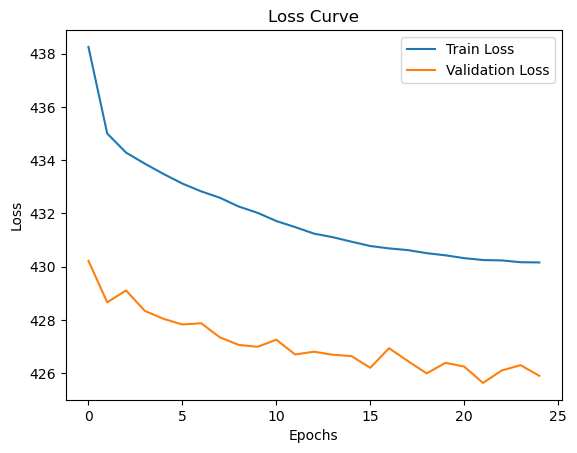

In [46]:
plt.plot(lvae.history["reconstruction_loss_train"], label="Train Loss")
plt.plot(lvae.history["reconstruction_loss_validation"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

In [41]:
dater.obs['predicted'] = lvae.predict(dater)

In [85]:
dater.obs['transfer_score'] = lvae.predict(soft = True).max(axis = 1)

In [86]:
dater = dater[dater.obs.Batch == 'Gaia_exp']

In [87]:
dater

View of AnnData object with n_obs × n_vars = 25300 × 2000
    obs: 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'cell_type', 'Batch', '_scvi_batch', '_scvi_labels', 'predicted', 'transfer_score'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_categorical_covs'

In [94]:
dater.obs[['predicted', 'transfer_score']]

,predicted,transfer_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3-0,club cell,0.838011
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3-0,bronchial goblet cell,0.999624
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3-0,tracheobronchial goblet cell,0.984624
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3-0,nasal mucosa goblet cell,0.981616
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3-0,club cell,0.999853
...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6-3,club cell,0.999576
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6-3,club cell,0.989853
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6-3,nasal mucosa goblet cell,0.996356
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6-3,epithelial cell of lower respiratory tract,0.998894


In [88]:
adata.obs = adata.obs.merge(right = dater.obs[['predicted', 'transfer_score']], left_index=True, right_index=True)

In [92]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet_score_scDbFinder,doublet_class_scDbFinder,doublet_dbd,doublet_score_dbd,cell_type,Batch,predicted,transfer_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,0.0,0.0,0.001438,singlet,0.0,9.467655e-15,Unknown,Gaia_exp,club cell,0.838011
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,0.0,0.0,0.004471,singlet,0.0,4.596916e-13,Unknown,Gaia_exp,bronchial goblet cell,0.999624
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,0.0,0.0,0.175868,singlet,0.0,8.579486e-03,Unknown,Gaia_exp,tracheobronchial goblet cell,0.984624
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,0.0,0.0,0.001208,singlet,0.0,2.458157e-06,Unknown,Gaia_exp,nasal mucosa goblet cell,0.981616
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3-0,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,0.0,0.0,0.001120,singlet,0.0,3.945921e-19,Unknown,Gaia_exp,club cell,0.999853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5428,5428,8.599510,17390.0,9.763708,15.043128,0.0,0.0,0.0,0.000336,singlet,0.0,3.440510e-11,Unknown,Gaia_exp,club cell,0.999576
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,6077,6077,8.712431,21812.0,9.990261,18.732808,0.0,0.0,0.0,0.001675,singlet,1.0,7.328824e+01,Unknown,Gaia_exp,club cell,0.989853
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,0.0,0.0,0.184157,singlet,0.0,1.199975e+00,Unknown,Gaia_exp,nasal mucosa goblet cell,0.996356
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6-3,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,0.0,0.0,0.064821,singlet,0.0,1.128238e-06,Unknown,Gaia_exp,epithelial cell of lower respiratory tract,0.998894


In [90]:
predictions

,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Goblet (nasal),0.319114,Secretory_Goblet,0.999951
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Goblet (nasal),0.951831,Secretory_Goblet,0.999886
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Goblet (nasal),0.824988,Secretory_Goblet,0.999993
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Goblet (nasal),0.357202,Secretory_Goblet,0.999483
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Goblet (nasal),0.602141,Secretory_Goblet,0.999654
...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6,AT2,0.055499,Secretory_Goblet,0.987707
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6,Goblet (nasal),0.080242,Secretory_Goblet,0.998898
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Goblet (nasal),0.997562,Secretory_Goblet,1.000000
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Goblet (nasal),0.996979,Secretory_Goblet,0.999873


In [99]:
adata.obs.index = adata.obs.index.str.replace(r'-\d+$', '', regex=True)
adata.obs_names = adata.obs.index

In [100]:
adata.obs = adata.obs.merge(right = predictions, left_index=True, right_index=True)

In [101]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,...,doublet_dbd,doublet_score_dbd,cell_type,Batch,predicted,transfer_score,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,...,0.0,9.467655e-15,Unknown,Gaia_exp,club cell,0.838011,Goblet (nasal),0.319114,Secretory_Goblet,0.999951
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,...,0.0,4.596916e-13,Unknown,Gaia_exp,bronchial goblet cell,0.999624,Goblet (nasal),0.951831,Secretory_Goblet,0.999886
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,...,0.0,8.579486e-03,Unknown,Gaia_exp,tracheobronchial goblet cell,0.984624,Goblet (nasal),0.824988,Secretory_Goblet,0.999993
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,...,0.0,2.458157e-06,Unknown,Gaia_exp,nasal mucosa goblet cell,0.981616,Goblet (nasal),0.357202,Secretory_Goblet,0.999483
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,...,0.0,3.945921e-19,Unknown,Gaia_exp,club cell,0.999853,Goblet (nasal),0.602141,Secretory_Goblet,0.999654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5428,5428,8.599510,17390.0,9.763708,15.043128,0.0,...,0.0,3.440510e-11,Unknown,Gaia_exp,club cell,0.999576,AT2,0.055499,Secretory_Goblet,0.987707
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,6077,6077,8.712431,21812.0,9.990261,18.732808,0.0,...,1.0,7.328824e+01,Unknown,Gaia_exp,club cell,0.989853,Goblet (nasal),0.080242,Secretory_Goblet,0.998898
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,...,0.0,1.199975e+00,Unknown,Gaia_exp,nasal mucosa goblet cell,0.996356,Goblet (nasal),0.997562,Secretory_Goblet,1.000000
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,...,0.0,1.128238e-06,Unknown,Gaia_exp,epithelial cell of lower respiratory tract,0.998894,Goblet (nasal),0.996979,Secretory_Goblet,0.999873


In [103]:
os.makedirs('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/unintegrated_scvilabels', exist_ok = True)

In [3]:
path_unintegrated_data = 'G:/Data processing pipeline 0.1 Yohan/scRNA/Output/unintegrated_scvilabels'

In [106]:
adata.write_h5ad(path_unintegrated_data +'/unintigrated.h5ad')

... storing 'cell_type' as categorical
... storing 'Batch' as categorical
... storing 'predicted' as categorical
... storing 'ref_model_celltypist1_label' as categorical
... storing 'ref_model_celltypist2_label' as categorical


# Integration

In [22]:
from scvi.autotune import ModelTuner
import tempfile

import ray
import scanpy as sc
import scvi
import seaborn as sns
import torch
from ray import tune
from scvi import autotune
import os
from matplotlib import pyplot as plt

In [4]:
adata = sc.read_h5ad(path_unintegrated_data +'/unintigrated.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 25300 × 18087
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score_scDbFinder', 'doublet_class_scDbFinder', 'doublet_dbd', 'doublet_score_dbd', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [5]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.1.6.post2


In [6]:
sc.pp.filter_genes(adata, min_cells = 50)

In [7]:
adata

AnnData object with n_obs × n_vars = 25300 × 13893
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score_scDbFinder', 'doublet_class_scDbFinder', 'doublet_dbd', 'doublet_score_dbd', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

### Selection of parameters

In [8]:
model_cls = scvi.model.SCVI
model_cls.setup_anndata(adata, categorical_covariate_keys = ['Id'],
                             continuous_covariate_keys=['pct_counts_mt', 'pct_counts_ribo'])

tuner = ModelTuner(model_cls)

In [9]:
tuner.info()

ModelTuner registry for SCVI

                  Tunable hyperparameters                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃      Hyperparameter      ┃ Default value ┃    Source    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│         n_hidden         │      128      │     VAE      │
│         n_latent         │      10       │     VAE      │
│         n_layers         │       1       │     VAE      │
│       dropout_rate       │      0.1      │     VAE      │
│        dispersion        │     gene      │     VAE      │
│     log_variational      │     True      │     VAE      │
│     gene_likelihood      │     zinb      │     VAE      │
│   latent_distribution    │    normal     │     VAE      │
│    encode_covariates     │     False     │     VAE      │
│ deeply_inject_covariates │     True      │     VAE      │
│      use_batch_norm      │     both      │     VAE      │
│      use_layer_norm      │     none      │     VAE      │
│  use_observed_lib_size   │     True      │     VAE      │
│      var_activation      │     None      │     VAE      │
│        optimizer         │     Adam      │ TrainingPlan │
│            lr            │     0.001     │ TrainingPlan │
│       weight_decay       │     1e-06     │ TrainingPlan │
│           eps            │     0.01      │ TrainingPlan │
│    n_steps_kl_warmup     │     None      │ TrainingPlan │
│    n_epochs_kl_warmup    │      400      │ TrainingPlan │
│   reduce_lr_on_plateau   │     False     │ TrainingPlan │
│        lr_factor         │      0.6      │ TrainingPlan │
│       lr_patience        │      30       │ TrainingPlan │
│       lr_threshold       │      0.0      │ TrainingPlan │
│          lr_min          │       0       │ TrainingPlan │
│      max_kl_weight       │      1.0      │ TrainingPlan │
│      min_kl_weight       │      0.0      │ TrainingPlan │
│        batch_size        │      128      │     SCVI     │
└──────────────────────────┴───────────────┴──────────────┘

       Available metrics        
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃     Metric      ┃    Mode    ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ validation_loss │    min     │
└─────────────────┴────────────┘

                         Default search space                         
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Hyperparameter ┃ Sample function ┃  Arguments  ┃ Keyword arguments ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│    n_hidden    │     choice      │ [[64, 128]] │        {}         │
└────────────────┴─────────────────┴─────────────┴───────────────────┘

In [10]:
search_space = {
    "n_hidden": tune.choice([92, 128, 192, 256]),
    "n_latent": tune.choice([10, 20, 30, 40, 50, 60]),
    "n_layers": tune.choice([1, 2, 3]),
    "lr": tune.loguniform(1e-4, 1e-2),
    "gene_likelihood": tune.choice(["nb", "zinb"])}

In [11]:
logging_dir = os.path.abspath("G:/ray_logs")

In [12]:
def short_dirname_creator(trial):
    return f"trial_{trial.trial_id}"

In [13]:
results = tuner.fit(adata, metric="validation_loss",
                    resources = {'gpu': 1}, #have to specify gpu or might not use
                    search_space = search_space,
                   num_samples = 100,
                   max_epochs = 20,
                    logging_dir = logging_dir
                   )

2025-02-06 17:18:28,724	INFO worker.py:1821 -- Started a local Ray instance.
2025-02-06 17:18:34,411	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2025-02-06 17:18:34,411	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
(_trainable pid=19980) C:\Users\test\anaconda3\envs\annot\lib\site-packages\ray\tune\integration\pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_trainable pid=19980) GPU available: True (cuda), used: True
(_trainable pid=19980) TPU available: False, using: 0 TPU cores
(_trainable pid=19980) HPU available: False, using: 0 HPUs
(_trainable pid=19980) LOCAL_RANK: 0 - CUDA

In [ ]:
best_vl = 10000
best_i = 0
for i, res in enumerate(results.results):
    vl = res.metrics['validation_loss']

    if vl < best_vl:
        best_vl = vl
        best_i = i

In [ ]:
results.results[best_i]

In [ ]:
#take the metrics from results and use them for integration parameters ( ==> n_hidden = 92, n_latent = 60, n_layers = 3)

### Run the integration model

In [8]:
scvi.model.SCVI.setup_anndata(adata,
                              categorical_covariate_keys = ['Id'],
                             continuous_covariate_keys=['pct_counts_mt', 'pct_counts_ribo'])

In [9]:
model = scvi.model.SCVI(adata, n_hidden = 92, n_latent = 60, n_layers = 3, gene_likelihood = 'zinb')

In [10]:
kwargs = {'lr': 0.0026}

In [11]:
model.train(max_epochs = 200, early_stopping = True, plan_kwargs = kwargs)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\test\anaconda3\envs\annot\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
C:\Users\test\anaconda3\envs\annot\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 200/200: 100%|██████| 200/200 [15:48<00:00,  4.69s/it, v_num=1, train_loss_step=1.2e+4, train_loss_epoch=1.17e+4]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████| 200/200 [15:48<00:00,  4.74s/it, v_num=1, train_loss_step=1.2e+4, train_loss_epoch=1.17e+4]


In [12]:
os.makedirs('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/the_model', exist_ok=True)

In [14]:
path_folder_model_integ = 'G:/Data processing pipeline 0.1 Yohan/scRNA/Output/the_model'

In [16]:
model.save(path_folder_model_integ + '/the_model')

In [ ]:
#restart kernel to free RAM if necessary

In [17]:
model = scvi.model.SCVI.load(path_folder_model_integ + '/the_model', adata)

INFO     File G:/Data processing pipeline 0.1 Yohan/scRNA/Output/the_model/the_model\model.pt already downloaded   


C:\Users\test\anaconda3\envs\annot\lib\site-packages\scvi\model\base\_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=

In [18]:
y = model.history['reconstruction_loss_validation']['reconstruction_loss_validation'].min()

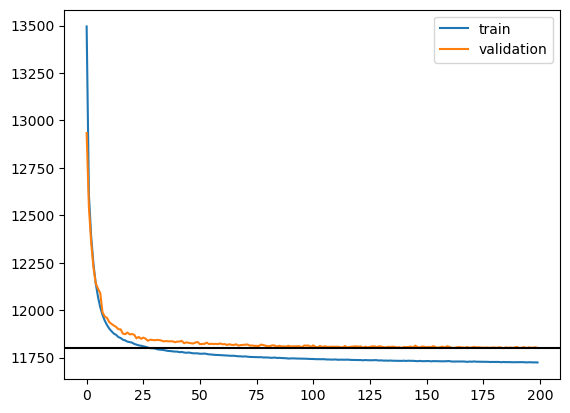

In [23]:
plt.plot(model.history['reconstruction_loss_train']['reconstruction_loss_train'], label='train Loss')
plt.plot(model.history['reconstruction_loss_validation']['reconstruction_loss_validation'], label='validation Loss')

plt.axhline(y, c = 'k')

plt.legend()
plt.show()

In [24]:
os.makedirs('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/integrated_data', exist_ok=True)

In [25]:
path_integrated = 'G:/Data processing pipeline 0.1 Yohan/scRNA/Output/integrated_data'

In [28]:
adata.write_h5ad('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/integrated_data' +'/'+ 'integrated_data.h5ad')

In [31]:
adata

AnnData object with n_obs × n_vars = 25300 × 13893
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score_scDbFinder', 'doublet_class_scDbFinder', 'doublet_dbd', 'doublet_score_dbd', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score', '_scvi_batch', '_scvi_labels'
    var: 'gene_names', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'

In [ ]:
##### Finishhhhhhheeeedddd

# Normalisation and Layering

In [23]:
from scipy.sparse import csr_matrix

In [19]:
adata = sc.read_h5ad('/home/ybeaumatin/Documents/Data processing pipeline 0.1 Yohan/scRNA/Output/integrated_data' +'/'+ 'integrated_data.h5ad')

In [22]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [5]:
#could be using Pearson too

In [146]:
analytic_pearson = sc.experimental.pp.normalize_pearson_residuals(adata, inplace=False)
adata.layers["analytic_pearson_residuals"] = csr_matrix(analytic_pearson["X"])

In [21]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,...,cell_type,Batch,predicted,transfer_score,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score,_scvi_batch,_scvi_labels
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,...,Unknown,Gaia_exp,club cell,0.838011,Goblet (nasal),0.319114,Secretory_Goblet,0.999951,0,0
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,...,Unknown,Gaia_exp,bronchial goblet cell,0.999624,Goblet (nasal),0.951831,Secretory_Goblet,0.999886,0,0
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,...,Unknown,Gaia_exp,tracheobronchial goblet cell,0.984624,Goblet (nasal),0.824988,Secretory_Goblet,0.999993,0,0
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,...,Unknown,Gaia_exp,nasal mucosa goblet cell,0.981616,Goblet (nasal),0.357202,Secretory_Goblet,0.999483,0,0
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,...,Unknown,Gaia_exp,club cell,0.999853,Goblet (nasal),0.602141,Secretory_Goblet,0.999654,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5428,5428,8.599510,17390.0,9.763708,15.043128,0.0,...,Unknown,Gaia_exp,club cell,0.999576,AT2,0.055499,Secretory_Goblet,0.987707,0,0
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,6077,6077,8.712431,21812.0,9.990261,18.732808,0.0,...,Unknown,Gaia_exp,club cell,0.989853,Goblet (nasal),0.080242,Secretory_Goblet,0.998898,0,0
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,...,Unknown,Gaia_exp,nasal mucosa goblet cell,0.996356,Goblet (nasal),0.997562,Secretory_Goblet,1.000000,0,0
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,...,Unknown,Gaia_exp,epithelial cell of lower respiratory tract,0.998894,Goblet (nasal),0.996979,Secretory_Goblet,0.999873,0,0


# Mapping & annotations

In [24]:
adata.X = adata.layers["log1p_norm"]

In [25]:
#UMAPS
sc.pp.neighbors(adata)
sc.tl.umap(adata)

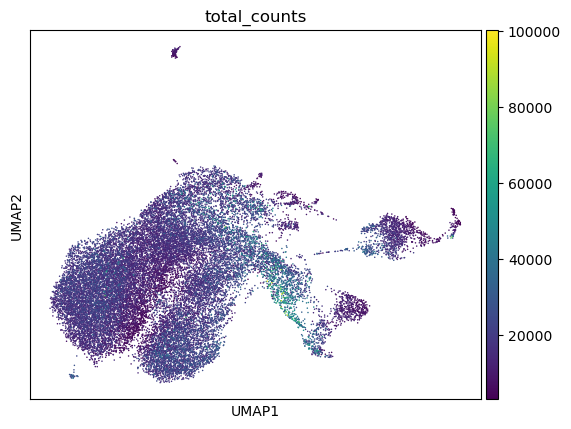

In [26]:
sc.pl.umap(adata, color="total_counts")

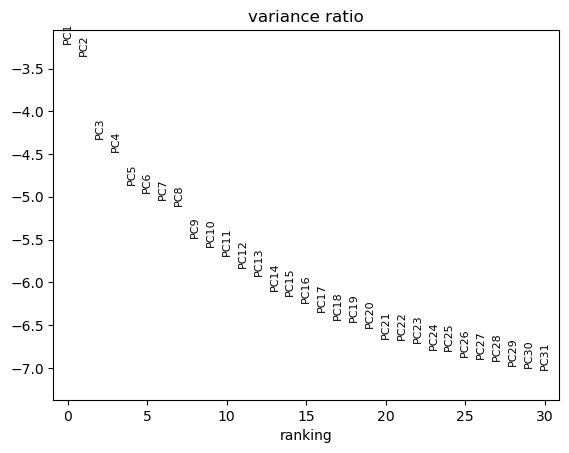

In [15]:
#Genes high Var
sc.pl.pca_variance_ratio(adata, log=True) # put it at the right place, see the most variable genes

In [11]:
#Mapping
%matplotlib inline
sc.pp.neighbors(adata, n_pcs=30) #adapter le nombre selon valeur coude trouve avec PCA
sc.tl.umap(adata)

In [12]:
sc.tl.leiden(adata, resolution = 3, key_added = 'overcluster')

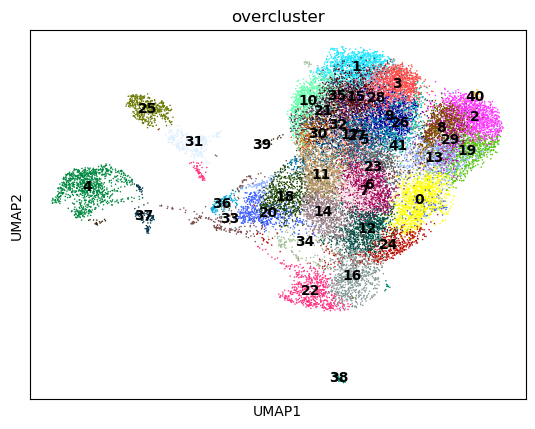

In [13]:
sc.pl.umap(
    adata,
    color=['overcluster'],
    legend_loc="on data",
)


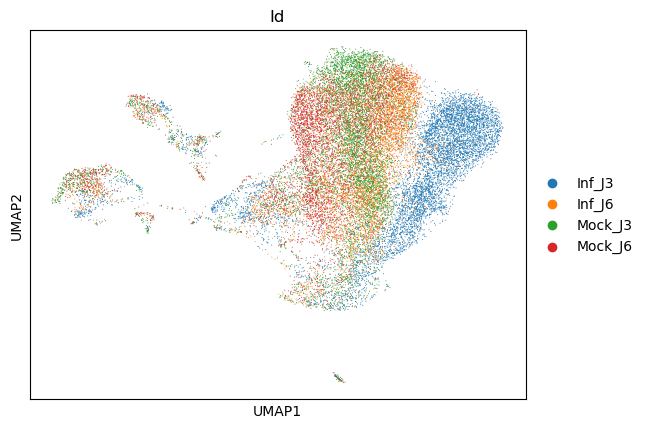

In [14]:
np.random.seed(1)
ri = np.random.permutation(list(range(adata.shape[0])))

sc.pl.umap(adata[ri,:], color = ['Id'], vmin = .5, size = 2)

In [15]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,...,Batch,predicted,transfer_score,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score,_scvi_batch,_scvi_labels,overcluster
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,...,Gaia_exp,club cell,0.838011,Goblet (nasal),0.319114,Secretory_Goblet,0.999951,0,0,0
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,...,Gaia_exp,bronchial goblet cell,0.999624,Goblet (nasal),0.951831,Secretory_Goblet,0.999886,0,0,29
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,...,Gaia_exp,tracheobronchial goblet cell,0.984624,Goblet (nasal),0.824988,Secretory_Goblet,0.999993,0,0,2
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,...,Gaia_exp,nasal mucosa goblet cell,0.981616,Goblet (nasal),0.357202,Secretory_Goblet,0.999483,0,0,24
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,...,Gaia_exp,club cell,0.999853,Goblet (nasal),0.602141,Secretory_Goblet,0.999654,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5428,5428,8.599510,17390.0,9.763708,15.043128,0.0,...,Gaia_exp,club cell,0.999576,AT2,0.055499,Secretory_Goblet,0.987707,0,0,14
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,6077,6077,8.712431,21812.0,9.990261,18.732808,0.0,...,Gaia_exp,club cell,0.989853,Goblet (nasal),0.080242,Secretory_Goblet,0.998898,0,0,5
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,...,Gaia_exp,nasal mucosa goblet cell,0.996356,Goblet (nasal),0.997562,Secretory_Goblet,1.000000,0,0,34
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,...,Gaia_exp,epithelial cell of lower respiratory tract,0.998894,Goblet (nasal),0.996979,Secretory_Goblet,0.999873,0,0,21


In [16]:
adata.obs['predicted'] = adata.obs.groupby('overcluster')['predicted'].transform(lambda x: x.mode()[0])

... storing 'predicted' as categorical


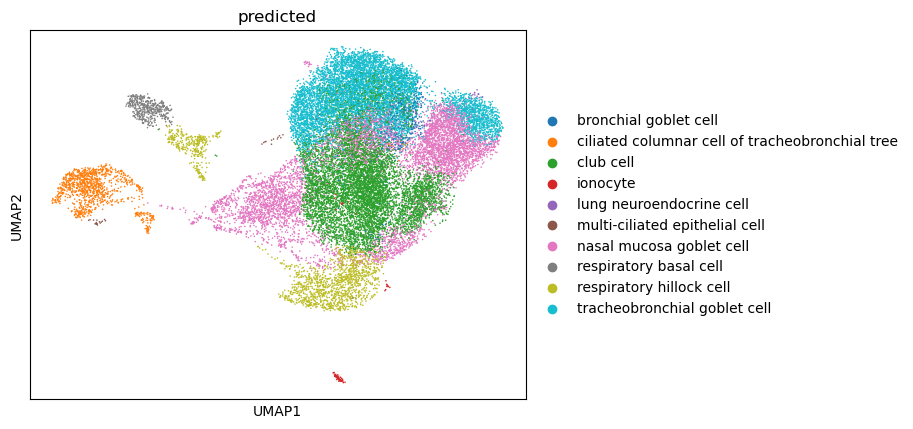

In [17]:
sc.pl.umap(adata, color = ['predicted'], s = 5)

... storing 'ref_model_celltypist1_label' as categorical


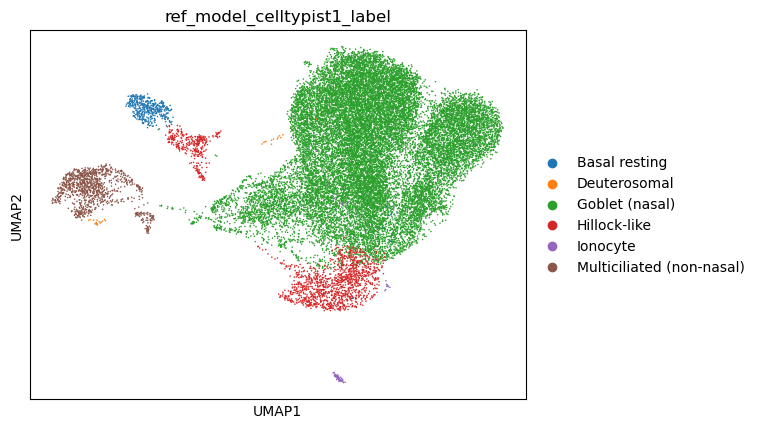

In [18]:
adata.obs['ref_model_celltypist1_label'] = adata.obs.groupby('overcluster')['ref_model_celltypist1_label'].transform(lambda x: x.mode()[0])

sc.pl.umap(adata, color = ['ref_model_celltypist1_label'], s = 5)

... storing 'ref_model_celltypist2_label' as categorical


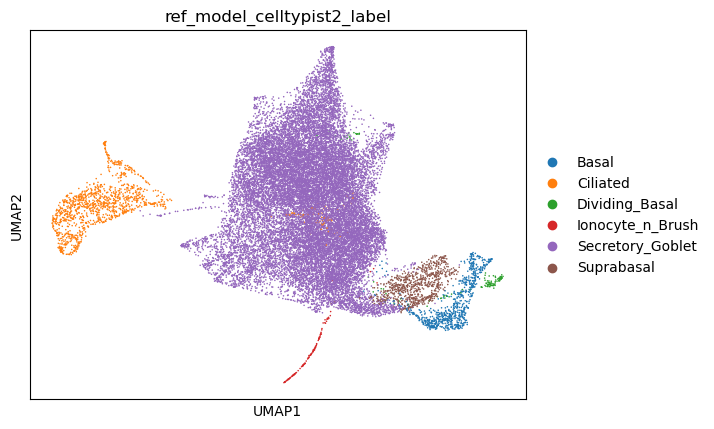

In [177]:
adata.obs['ref_model_celltypist2_label'] = adata.obs.groupby('overcluster')['ref_model_celltypist2_label'].transform(lambda x: x.mode()[0])

sc.pl.umap(adata, color = ['ref_model_celltypist2_label'], s = 5)

## Annotation

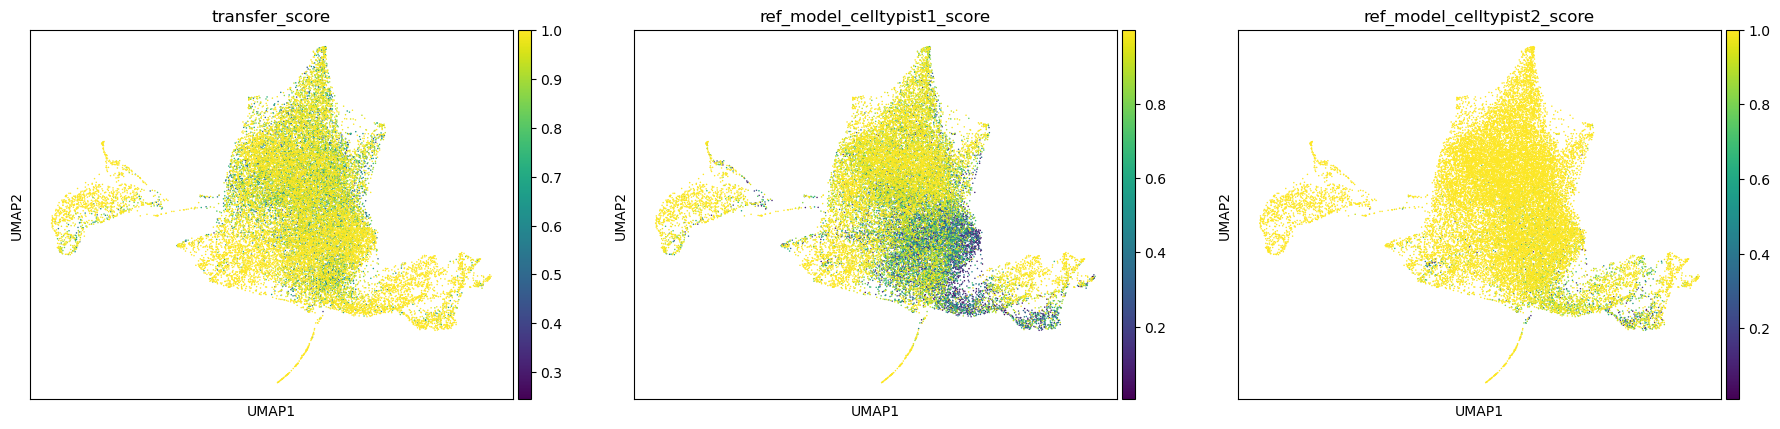

In [178]:
sc.pl.umap(adata, color = ['transfer_score', 'ref_model_celltypist1_score', 'ref_model_celltypist2_score' ])

In [179]:
labels = adata.obs[['predicted', 'ref_model_celltypist1_label', 'ref_model_celltypist2_label','overcluster']].groupby('overcluster').agg(lambda x: x.mode())
scores = adata.obs[['transfer_score', 'ref_model_celltypist1_score','ref_model_celltypist2_score','overcluster']].groupby('overcluster').agg(lambda x: x.mean())

mapping_res = labels.merge(right = scores, left_index=True, right_index=True)

In [180]:
mapping_res

,predicted,ref_model_celltypist1_label,ref_model_celltypist2_label,transfer_score,ref_model_celltypist1_score,ref_model_celltypist2_score
overcluster,,,,,,
0,club cell,Goblet (nasal),Secretory_Goblet,0.867022,0.570671,0.966842
1,respiratory hillock cell,Goblet (nasal),Secretory_Goblet,0.944830,0.418999,0.868965
2,club cell,Goblet (nasal),Secretory_Goblet,0.865896,0.569074,0.956723
3,club cell,Goblet (nasal),Secretory_Goblet,0.854915,0.766060,0.989875
4,club cell,Goblet (nasal),Secretory_Goblet,0.814823,0.872303,0.974774
5,tracheobronchial goblet cell,Goblet (nasal),Secretory_Goblet,0.889582,0.899403,0.998964
6,nasal mucosa goblet cell,Goblet (nasal),Secretory_Goblet,0.889156,0.711205,0.983805
7,tracheobronchial goblet cell,Goblet (nasal),Secretory_Goblet,0.861012,0.856496,0.995308
8,tracheobronchial goblet cell,Goblet (nasal),Secretory_Goblet,0.859930,0.936910,0.993181


In [181]:
os.makedirs('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/overcluster_data', exist_ok = True)

In [182]:
adata.write_h5ad('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/overcluster_data' + '/overcluster_data.h5ad')

#### Marker genes

In [ ]:
Gene_marker_scatlas = {
    "Cellules basales": ["TP63", "KRT5", "KRT15"],
    "Cellules basales-2": ["CXCL14", "RNF43", "LGR6", "LRP4"],
    "Cellules en transition basale (TAB)": ["NOTUM", "FGF3", "FGF19"],
    "Cellules sécrétoires club": ["SCGB1A1", "BPIFB1"],
    "Cellules ciliées": ["FOXJ1", "PIFO", "TPPP3", "SNTN"],
    "Cellules tuft-1": ["ASCL2"],
    "Cellules tuft-2": ["TRPM5"],
    "Ionocytes": ["FOXI1"],
    "Cellules neuroendocrines pulmonaires (PNECs)": ["ASCL1"],
    "Cellules immuno-préparées (immune-primed)": ["CXCL1", "CXCL2", "CXCL8", "CCL2", "CCL20", "SAA1", "SAA2", "IFITM1", "IFITM2", "IFITM3"]
} #from sc atlas study

In [ ]:
Gene_marker_nasal_airway = {
    "Basal Cells": ["KRT5", "KRT15"],
    "Goblet Cells": ["MUC5AC"],
    "Ciliated Cells": ["FOXJ1", "TUBB4B"],
    "Tuft Cells": ["POU2F3", "ASCL2", "TRPM5"],
    "Ionocytes": ["FOXI1"],
    "Pulmonary Neuroendocrine Cells (PNECs)": ["ASCL1"],
    "Transitioning Airway Basal (TAB) Cells": ["NOTUM", "FGF3", "FGF19"]
} #from nasal airway study

In [ ]:
Gene_marker_deprez_2020 = {
    "Cellules basales": ["KRT5", "TP63", "DLK2"],
    "Cellules suprabasales": ["KRT19", "NOTCH3"],
    "Cellules sécrétoires": ["SCGB1A1", "TFF3", "MUC5AC", "MUC5B"],
    "Cellules ciliées": ["FOXJ1", "TPPP3", "SNTN"],
    "Cellules deutérosomales": ["DEUP1", "FOXN4", "CDC20B"],
    "Cellules mucineuses": ["MUC5B"],
    "Cellules séreuses": ["LTF", "LYZ", "PIP"],
    "Cellules rares": ["NREP", "STMN1", "MDK"],
    "Ionocytes": ["FOXI1", "ASCL3", "CFTR"],
    "Cellules neuroendocrines pulmonaires (PNECs)": ["ASCL1", "PCSK1N", "SCGN", "NEB"],
    "Cellules tuft": ["LRMP", "RGS13"],
    "Cellules endothéliales": ["ACKR1"],
    "Fibroblastes": ["FBLN1"],
    "Cellules musculaires lisses": ["DES", "ACTA2", "MYL9"],
    "Péricytes": ["PDGFRB", "MCAM", "RERGL"],
    "Macrophages": ["TYROBP", "APOC1", "C1QA"],
    "Monocytes": ["SDS", "C15orf48"],
    "Cellules dendritiques": ["FNIP2", "CST3"],
    "Mastocytes": ["TPSAB1", "CPA3", "HPGDS"],
    "Cellules T": ["IL32", "CD3D", "CCL5", "LTB"],
    "Cellules B": ["MS4A1", "CD79A"],
    "Plasmocytes": ["IGJ", "SSR4", "MZB1"]
}
# from the deprez 2020 study

In [ ]:
Gene_marker_Ha_Cho = {
    "Cellules ciliées": ["FOXJ1", "acetyl-α-tubulin"],
    "Cellules deutérosomales": ["FOXJ1", "DEUP1", "PLK4", "CCNO", "CEP78"],
    "Cellules club": ["KRT7", "SCGB1A1"],
    "Cellules caliciformes (goblet cells)": ["MUC5AC", "KRT7", "SCGB1A1"],
    "Ionocytes": ["CFTR", "ASCL3", "FOXI1"],
    "Cellules suprabasales": ["SERPINB4", "KRT5"],
    "Cellules basales en division": ["MKI67", "KRT15", "KRT5"],
    "Cellules basales non en division": ["MKI67-", "KRT5", "TP63"],
    "Cellules glandulaires": ["MUC5B"],
    "Cellules neuroendocrines": ["ASCL1"],
    "Cellules immuno-préparées": ["CXCL1", "CXCL2", "CXCL8", "CCL2", "CCL20", "SAA1", "SAA2", "IFITM1", "IFITM2", "IFITM3"],
    "Cellules transitionnelles": ["NOTUM", "FGF3", "FGF19"],
    "Cellules tuft-1": ["ASCL2"],
    "Cellules tuft-2": ["TRPM5"]
} #from the Unraveling the Role of Epithelial Cells in the Development of Chronic Rhinosinusitis

## Work on the cell markers

In [183]:
adata = sc.read_h5ad('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/overcluster_data' + '/overcluster_data.h5ad')

In [184]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,...,Batch,predicted,transfer_score,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score,_scvi_batch,_scvi_labels,overcluster
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,...,Gaia_exp,club cell,0.838011,Goblet (nasal),0.319114,Secretory_Goblet,0.999951,0,0,0
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,...,Gaia_exp,nasal mucosa goblet cell,0.999624,Goblet (nasal),0.951831,Secretory_Goblet,0.999886,0,0,10
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,...,Gaia_exp,tracheobronchial goblet cell,0.984624,Goblet (nasal),0.824988,Secretory_Goblet,0.999993,0,0,14
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,...,Gaia_exp,club cell,0.981616,Goblet (nasal),0.357202,Secretory_Goblet,0.999483,0,0,36
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,...,Gaia_exp,club cell,0.999853,Goblet (nasal),0.602141,Secretory_Goblet,0.999654,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5428,5428,8.599510,17390.0,9.763708,15.043128,0.0,...,Gaia_exp,club cell,0.999576,Goblet (nasal),0.055499,Secretory_Goblet,0.987707,0,0,20
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,6077,6077,8.712431,21812.0,9.990261,18.732808,0.0,...,Gaia_exp,club cell,0.989853,Goblet (nasal),0.080242,Secretory_Goblet,0.998898,0,0,4
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,...,Gaia_exp,club cell,0.996356,Goblet (nasal),0.997562,Secretory_Goblet,1.000000,0,0,36
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,...,Gaia_exp,tracheobronchial goblet cell,0.998894,Goblet (nasal),0.996979,Secretory_Goblet,0.999873,0,0,8


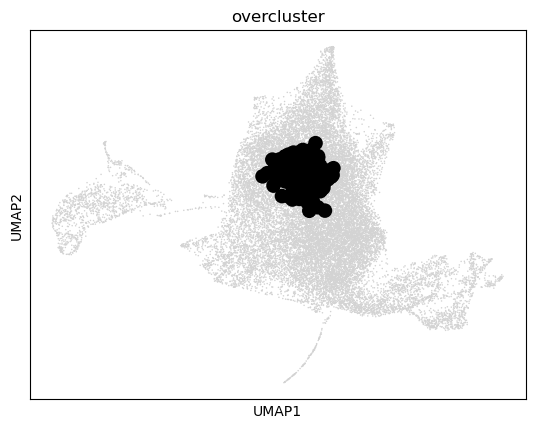

In [185]:
ax = sc.pl.umap(adata, palette = 'lightgrey', show = False)
sc.pl.umap(adata[adata.obs.overcluster == '39'], color = 'overcluster', ax = ax, legend_loc = None, palette = 'k')

#### Hcov 229E observation

In [186]:
genes_of_interest = ['EGFP', 'GLYCO', 'MEMB', 'NUCL', 'REPLI']

In [187]:
mask = np.zeros(adata.shape[0], dtype=bool)

for gene in genes_of_interest:
    if gene in adata.var_names:
        mask |= (adata[:, gene].X.toarray() > 0).flatten()

num_cells_expressing = np.sum(mask)
print(f"Nombre de cellules exprimant au moins un des gènes d'intérêt : {num_cells_expressing}")

Nombre de cellules exprimant au moins un des gènes d'intérêt : 1347


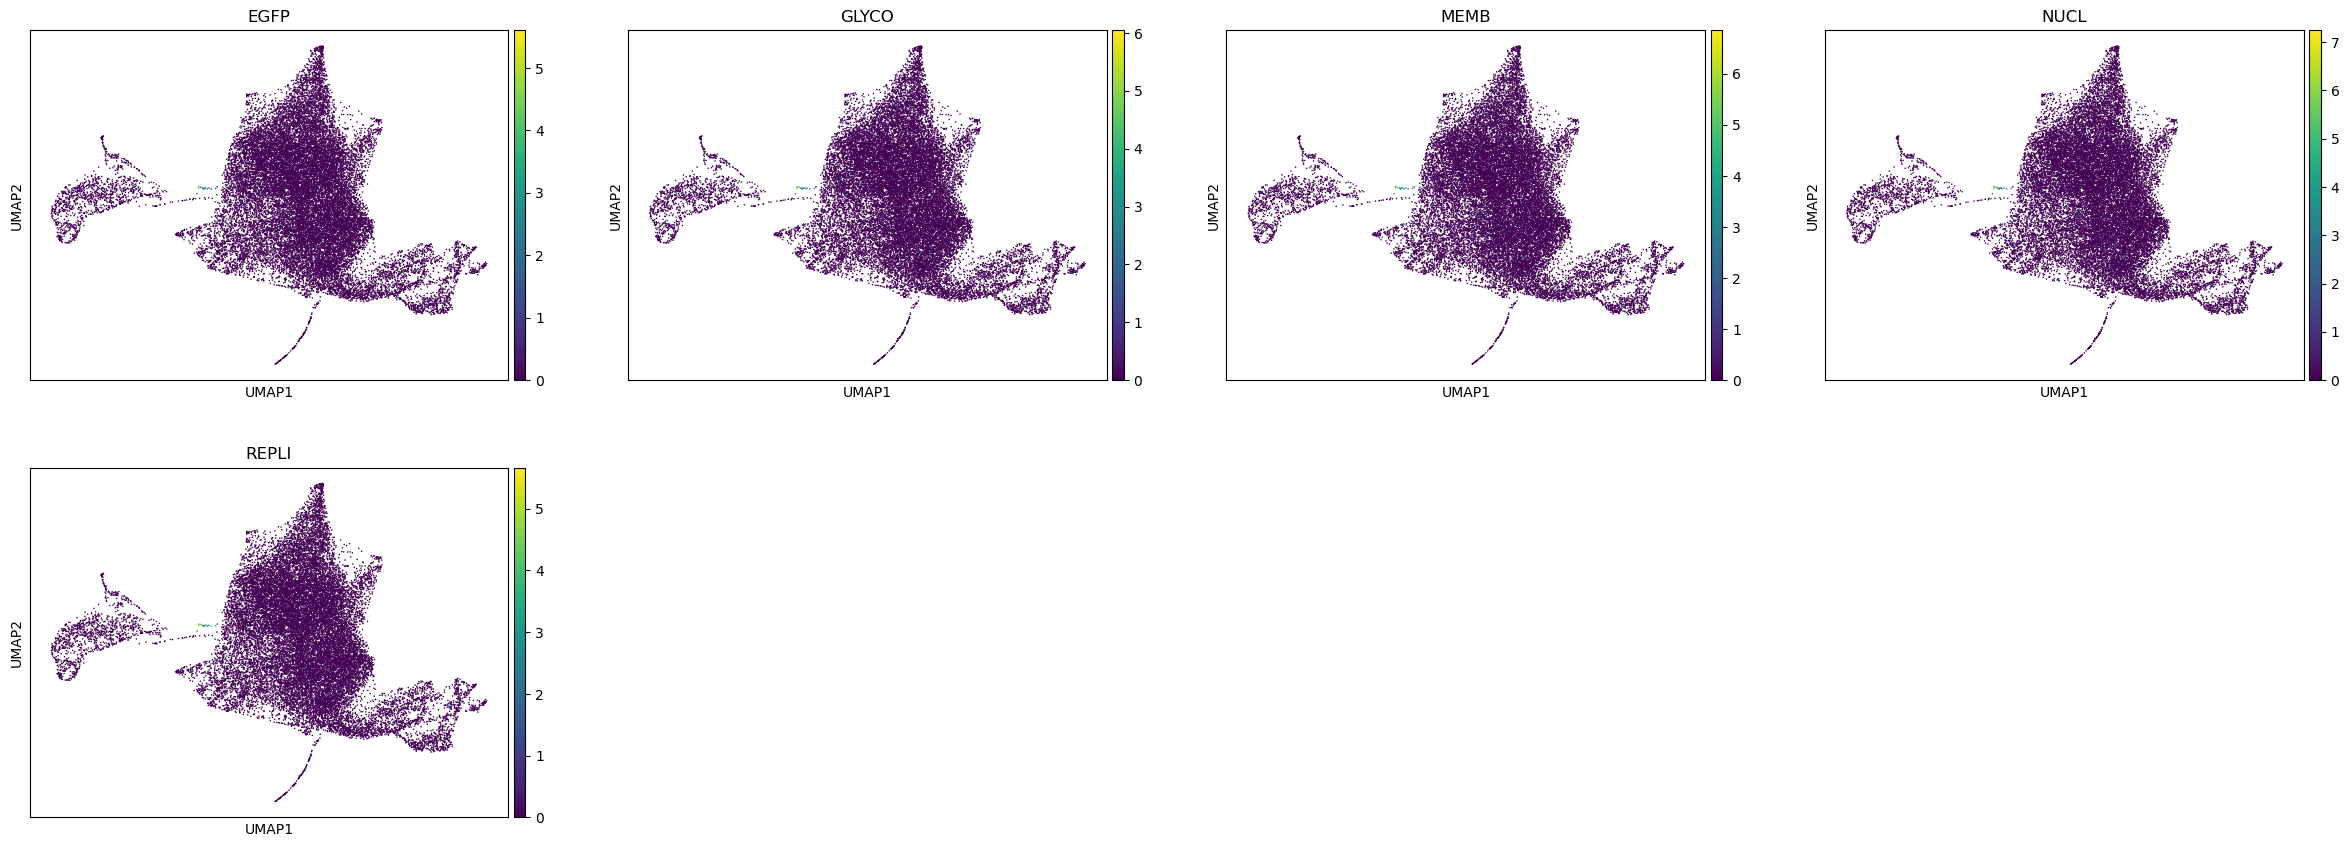

In [188]:
sc.pl.umap(adata, color = ['EGFP', 'GLYCO','MEMB','NUCL','REPLI'], legend_loc = 'on data', s = 5)

In [190]:
adata.obs['229E'] = adata[:, genes_of_interest].X.sum(axis=1) > 0

In [191]:
adata.var

,gene_names,feature_types,genome,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells
ENSG00000188976,NOC2L,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,10296,0.594585,0.466614,59.304348,15043.0,9.618734,10296
ENSG00000187961,KLHL17,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,1725,0.073518,0.070941,93.181818,1860.0,7.528869,1725
ENSG00000187583,PLEKHN1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,3808,0.227510,0.204988,84.948617,5756.0,8.658172,3808
ENSG00000187642,PERM1,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,157,0.006838,0.006815,99.379447,173.0,5.159055,157
ENSG00000188290,HES4,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,12644,0.958854,0.672360,50.023715,24259.0,10.096584,12644
...,...,...,...,...,...,...,...,...,...,...,...,...,...
EGFP,EGFP,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,190,0.040356,0.039563,99.249012,1021.0,6.929517,190
REPLI,REPLI,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,317,0.068142,0.065921,98.747036,1724.0,7.452982,317
GLYCO,GLYCO,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,308,0.073834,0.071235,98.782609,1868.0,7.533159,308
MEMB,MEMB,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1,False,False,False,524,0.128103,0.120537,97.928854,3241.0,8.083945,524


<Axes: title={'center': '229E'}, xlabel='UMAP1', ylabel='UMAP2'>

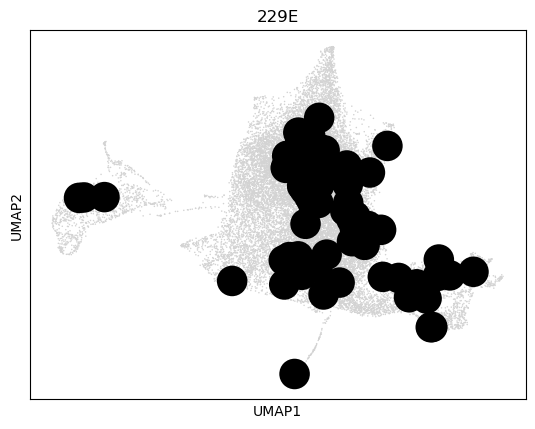

In [192]:
ax = sc.pl.umap(adata, palette = 'lightgrey', show = False)

sc.pl.umap(
    adata[adata.obs['229E'] & (adata.obs["Sample"] == "Mock")], 
    color='229E',
    ax=ax,
    legend_loc=None, 
    palette=['k'],
    show=False)

In [193]:
print(f"Nombre de cellules sélectionnées : {adata[(adata.obs['229E']) & (adata.obs['Sample'] == 'Mock')].n_obs}")


Nombre de cellules sélectionnées : 62


<Axes: title={'center': '229E'}, xlabel='UMAP1', ylabel='UMAP2'>

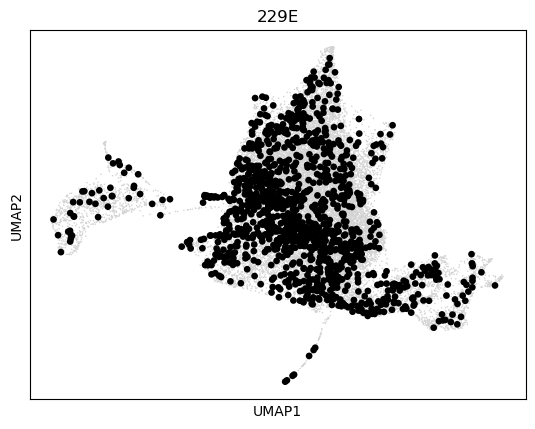

In [194]:
ax = sc.pl.umap(adata, palette = 'lightgrey', show = False)

sc.pl.umap(
    adata[adata.obs['229E'] & (adata.obs["Sample"] == "Inf")], 
    color='229E',
    ax=ax,
    legend_loc=None, 
    palette=['k'],
    show=False)

In [195]:
print(f"Nombre de cellules sélectionnées : {adata[(adata.obs['229E']) & (adata.obs['Sample'] == 'Inf')].n_obs}")


Nombre de cellules sélectionnées : 1285


<Axes: title={'center': '229E'}, xlabel='UMAP1', ylabel='UMAP2'>

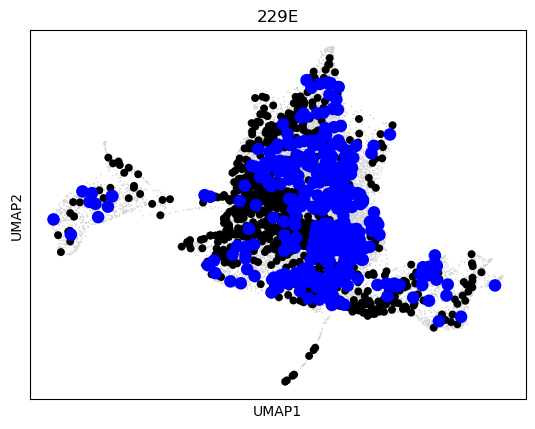

In [196]:
ax = sc.pl.umap(adata, palette = 'lightgrey', show = False)

sc.pl.umap(
    adata[adata.obs['229E'] & (adata.obs["Id"] == "Inf_J3")], 
    color='229E',
    ax=ax,
    legend_loc=None, 
    palette=['k'],
    show=False)
sc.pl.umap(
    adata[adata.obs['229E'] & (adata.obs["Id"] == "Inf_J6")], 
    color='229E',
    ax=ax,
    legend_loc=None, 
    palette=['b'],
    show=False)

In [197]:
print(f"Number of cells infected in Inf_J3 : {adata[(adata.obs['229E']) & (adata.obs['Id'] == 'Inf_J3')].n_obs}")
print(f"Number of cells infected in Inf_J6 : {adata[(adata.obs['229E']) & (adata.obs['Id'] == 'Inf_J6')].n_obs}")

Number of cells infected in Inf_J3 : 918
Number of cells infected in Inf_J6 : 367


In [198]:
print(f"Number of cells infected in Inf_J3 : {adata[(adata.obs['229E']) & (adata.obs['Id'] == 'Mock_J3')].n_obs}")
print(f"Number of cells infected in Inf_J6 : {adata[(adata.obs['229E']) & (adata.obs['Id'] == 'Mock_J6')].n_obs}")

Number of cells infected in Inf_J3 : 28
Number of cells infected in Inf_J6 : 34


##### Test on Mock pos cells and Inf pos cells expression

In [199]:
filtered_cells = adata.obs[(adata.obs['Sample'] == 'Mock') & (adata.obs['229E'] == True)]
cell_names = filtered_cells.index.tolist()
print(cell_names)

['ACCCTCACACCACAAAACTTTAGG-1-Mock_J3', 'ACTTGCTCAATATGGTACTTTAGG-1-Mock_J3', 'AGGTTAATCCCACATAACTTTAGG-1-Mock_J3', 'ATATCGAAGCTATCCAACTTTAGG-1-Mock_J3', 'CAATAGCAGGCTGGTAACTTTAGG-1-Mock_J3', 'CAGGTAAGTCTCAGCAACTTTAGG-1-Mock_J3', 'CGCTCAGTCAGTCTATACTTTAGG-1-Mock_J3', 'CGTTATGTCGAAATGCACTTTAGG-1-Mock_J3', 'CTACGAACATGGCTTTACTTTAGG-1-Mock_J3', 'CTTTGGTCACATGCTTACTTTAGG-1-Mock_J3', 'GACAGTTAGGACACGCACTTTAGG-1-Mock_J3', 'GCTACAACAATGGGAGACTTTAGG-1-Mock_J3', 'GCTTATTAGTGCTGAGACTTTAGG-1-Mock_J3', 'GGCTGTGCAAACAAGAACTTTAGG-1-Mock_J3', 'GGCTTATGTATTCGACACTTTAGG-1-Mock_J3', 'GTCCTGAGTATTACCAACTTTAGG-1-Mock_J3', 'GTTAGGCCATGTGGCGACTTTAGG-1-Mock_J3', 'GTTTGTAGTGCTGCACACTTTAGG-1-Mock_J3', 'TATATCCAGATAATCGACTTTAGG-1-Mock_J3', 'TATGGGAGTGACATTCACTTTAGG-1-Mock_J3', 'TCCACCCTCGCCTCTCACTTTAGG-1-Mock_J3', 'TCCCTTTAGGGATGAAACTTTAGG-1-Mock_J3', 'TGCGCTTAGACCATTTACTTTAGG-1-Mock_J3', 'TTCCTTTCACGTAGGTACTTTAGG-1-Mock_J3', 'TTCGATTAGGCCTTCGACTTTAGG-1-Mock_J3', 'TTCGCCACACTATGTCACTTTAGG-1-Mock_J3', 'TTCTAAGGTG

In [200]:
filtered_cells.var

<bound method DataFrame.var of                                    Sample dpi       Id  n_genes  \
ACCCTCACACCACAAAACTTTAGG-1-Mock_J3   Mock  J3  Mock_J3     5797   
ACTTGCTCAATATGGTACTTTAGG-1-Mock_J3   Mock  J3  Mock_J3     7457   
AGGTTAATCCCACATAACTTTAGG-1-Mock_J3   Mock  J3  Mock_J3     3484   
ATATCGAAGCTATCCAACTTTAGG-1-Mock_J3   Mock  J3  Mock_J3     6954   
CAATAGCAGGCTGGTAACTTTAGG-1-Mock_J3   Mock  J3  Mock_J3     5251   
...                                   ...  ..      ...      ...   
TCTAACCCAGGTTTCTAACGGGAA-1-Mock_J6   Mock  J6  Mock_J6     6754   
TGAGGCGGTAAGCGTAAACGGGAA-1-Mock_J6   Mock  J6  Mock_J6     4137   
TGCGGAATCTATTGACAACGGGAA-1-Mock_J6   Mock  J6  Mock_J6     5648   
TGCGGCTGTCCCTCATAACGGGAA-1-Mock_J6   Mock  J6  Mock_J6     7041   
TGGCATGAGGTAACTAAACGGGAA-1-Mock_J6   Mock  J6  Mock_J6     3329   

                                    n_genes_by_counts  \
ACCCTCACACCACAAAACTTTAGG-1-Mock_J3               5797   
ACTTGCTCAATATGGTACTTTAGG-1-Mock_J3               7

In [201]:
filtered_cells = adata[(adata.obs['Sample'] == 'Mock') & (adata.obs['229E'] == True)]
filtered_cell_indices = filtered_cells.obs.index

expr_data = adata[filtered_cell_indices, genes_of_interest].X

mean_expression = np.mean(expr_data.toarray(), axis=0) 
std_expression = np.std(expr_data.toarray(), axis=0)    
median_expression = np.median(expr_data.toarray(), axis=0) 

stats_df = pd.DataFrame({
    'Gene': genes_of_interest,
    'Mean Expression': mean_expression,
    'Standard Deviation': std_expression,
    'Median Expression': median_expression
})

print(stats_df)

    Gene  Mean Expression  Standard Deviation  Median Expression
0   EGFP         0.079473            0.269599                0.0
1  GLYCO         0.106129            0.251755                0.0
2   MEMB         0.158123            0.371820                0.0
3   NUCL         0.334916            0.397922                0.0
4  REPLI         0.057138            0.205865                0.0


In [202]:
print(np.min(expr_data.toarray()), np.max(expr_data.toarray()))

0.0 1.9823256


In [203]:
def median_nonzero(a):
    a = a[a != 0]
    if len(a) == 0:
        return 0
    return np.median(a)

median_expression = np.apply_along_axis(median_nonzero, 0, expr_data.toarray())

In [204]:
gene_stats = []
for i, gene in enumerate(genes_of_interest):
    gene_data = expr_data.toarray()[:, i]
    non_zero = gene_data[gene_data != 0] 

  
    gene_stats.append({
        'Gene': gene,
        'Non-Zero Count': len(non_zero),
        'Total Count': len(gene_data),
        'Min (Non-Zero)': np.min(non_zero) if len(non_zero) > 0 else 0,
        'Max (Non-Zero)': np.max(non_zero) if len(non_zero) > 0 else 0,
        'Median (All)': np.median(gene_data),
        'Median (Non-Zero)': np.median(non_zero) if len(non_zero) > 0 else 'N/A'
    })

stats_df = pd.DataFrame(gene_stats)
print(stats_df)

    Gene  Non-Zero Count  Total Count  Min (Non-Zero)  Max (Non-Zero)  \
0   EGFP               7           62        0.231690        1.648349   
1  GLYCO              10           62        0.308069        0.848121   
2   MEMB              12           62        0.337954        1.982326   
3   NUCL              28           62        0.275511        1.190259   
4  REPLI               5           62        0.421698        1.161773   

   Median (All)  Median (Non-Zero)  
0           0.0           0.752686  
1           0.0           0.696779  
2           0.0           0.743328  
3           0.0           0.716793  
4           0.0           0.707598  


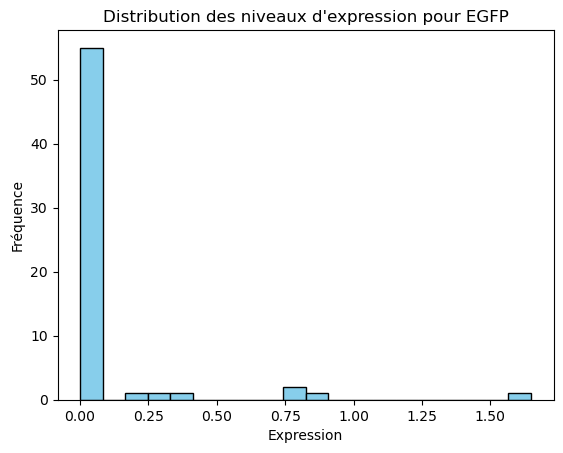

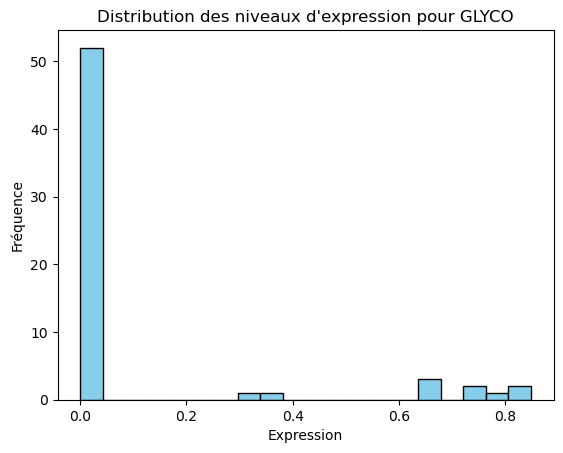

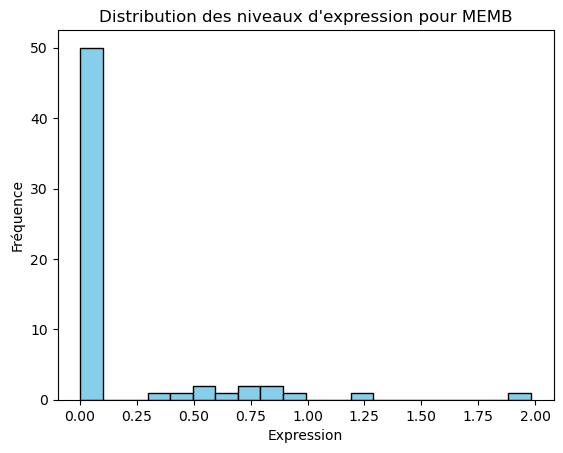

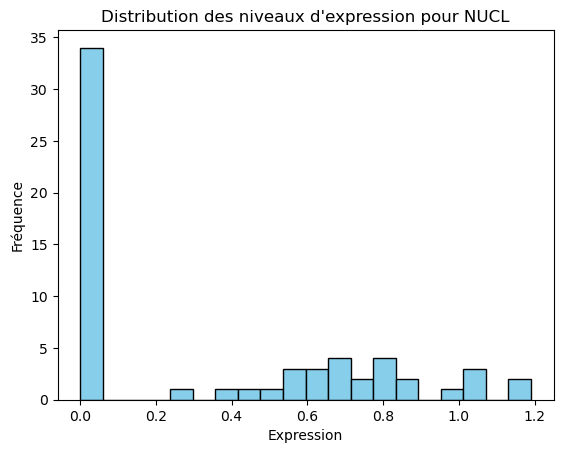

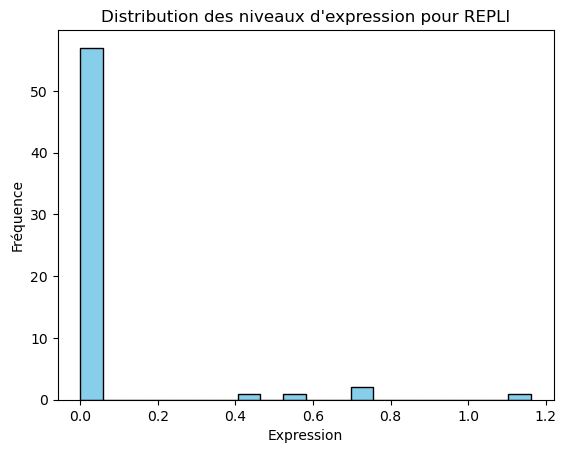

In [205]:
for k in range(len(genes_of_interest)):
    gene_index = k 
    gene_name = genes_of_interest[gene_index]
    gene_data = expr_data.toarray()[:, gene_index]

    plt.hist(gene_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution des niveaux d'expression pour {gene_name}")
    plt.xlabel("Expression")
    plt.ylabel("Fréquence")
    plt.show()

In [206]:
filtered_cells = adata[(adata.obs['Sample'] == 'Inf') & (adata.obs['229E'] == True)]
filtered_cell_indices = filtered_cells.obs.index

expr_data = adata[filtered_cell_indices, genes_of_interest].X

mean_expression = np.mean(expr_data.toarray(), axis=0) 
std_expression = np.std(expr_data.toarray(), axis=0)    
median_expression = np.median(expr_data.toarray(), axis=0) 

stats_df = pd.DataFrame({
    'Gene': genes_of_interest,
    'Mean Expression': mean_expression,
    'Standard Deviation': std_expression,
    'Median Expression': median_expression
})

print(stats_df)

    Gene  Mean Expression  Standard Deviation  Median Expression
0   EGFP         0.149899            0.479395                0.0
1  GLYCO         0.236771            0.588106                0.0
2   MEMB         0.374103            0.682776                0.0
3   NUCL         0.364234            0.692466                0.0
4  REPLI         0.244814            0.598373                0.0


In [207]:
print(np.min(expr_data.toarray()), np.max(expr_data.toarray()))

0.0 7.247288


In [208]:
def median_nonzero(a):
    a = a[a != 0]
    if len(a) == 0:
        return 0
    return np.median(a)

median_expression = np.apply_along_axis(median_nonzero, 0, expr_data.toarray())

In [209]:
gene_stats = []
for i, gene in enumerate(genes_of_interest):
    gene_data = expr_data.toarray()[:, i]
    non_zero = gene_data[gene_data != 0] 

  
    gene_stats.append({
        'Gene': gene,
        'Non-Zero Count': len(non_zero),
        'Total Count': len(gene_data),
        'Min (Non-Zero)': np.min(non_zero) if len(non_zero) > 0 else 0,
        'Max (Non-Zero)': np.max(non_zero) if len(non_zero) > 0 else 0,
        'Median (All)': np.median(gene_data),
        'Median (Non-Zero)': np.median(non_zero) if len(non_zero) > 0 else 'N/A'
    })

stats_df = pd.DataFrame(gene_stats)
print(stats_df)

    Gene  Non-Zero Count  Total Count  Min (Non-Zero)  Max (Non-Zero)  \
0   EGFP             183         1285        0.168602        5.603363   
1  GLYCO             298         1285        0.231354        6.047511   
2   MEMB             512         1285        0.156547        6.854306   
3   NUCL             496         1285        0.210154        7.247288   
4  REPLI             312         1285        0.170396        5.665337   

   Median (All)  Median (Non-Zero)  
0           0.0           0.750341  
1           0.0           0.729495  
2           0.0           0.679438  
3           0.0           0.657602  
4           0.0           0.692174  


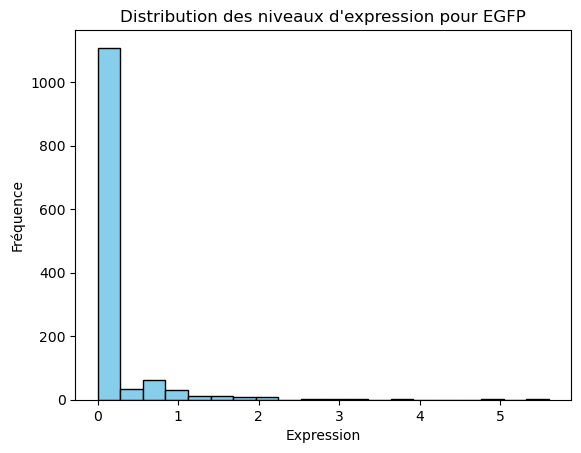

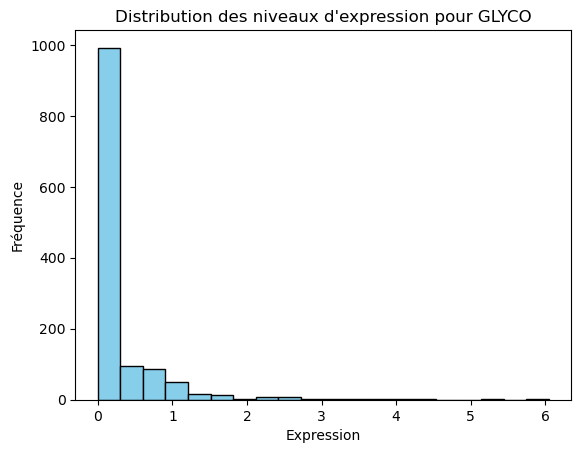

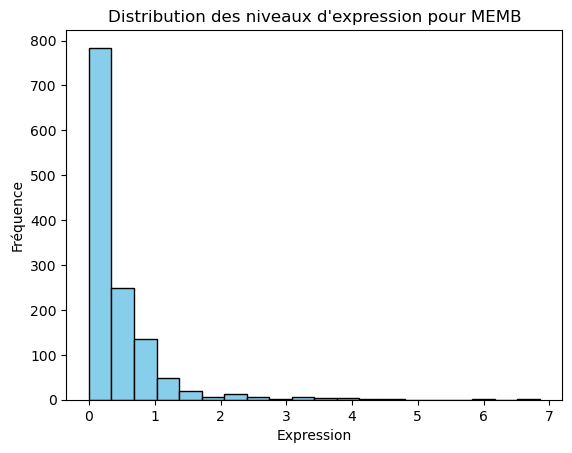

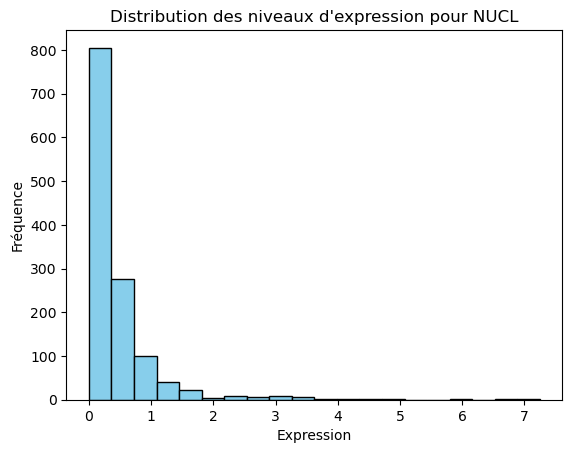

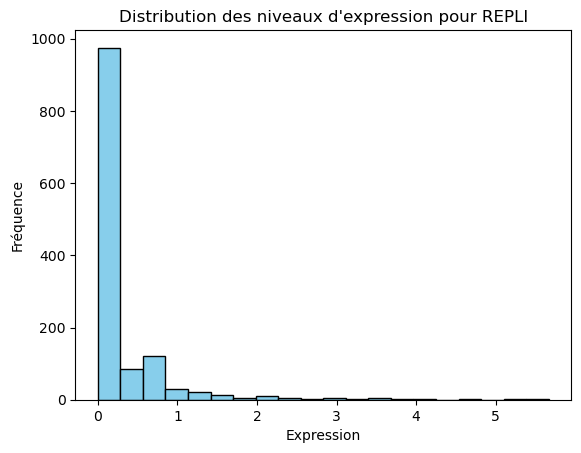

In [210]:
for k in range(len(genes_of_interest)):
    gene_index = k 
    gene_name = genes_of_interest[gene_index]
    gene_data = expr_data.toarray()[:, gene_index]

    plt.hist(gene_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution des niveaux d'expression pour {gene_name}")
    plt.xlabel("Expression")
    plt.ylabel("Fréquence")
    plt.show()

### Cell type assignation work

#### Assignation of cell types for each clusters

In [66]:
cell_assignation = {"0":"",
"1":"",
"2":"",
"3":"",
"4":"",
"5":"",
"6":"",
"7":"",
"8":"",
"9":"",
"10":"",
"11":"",
"12":"",
"13":"",
"14":"",
"15":"",
"16":"",
"17":"",
"18":"",
"19":"",
"20":"",
"21":"",
"22":"",
"23":"",
"24":"",
"25":"",
"26":"",
"27":"",
"28":"",
"29":"",
"30":"",
"31":"",
"32":"",
"33":"",
"34":"",
"35":"",
"36":"",
"37":"",
"38":"",
"39":"",
"40":"",
"41":""
}

In [ ]:
adata.obs['CellType_assignated'] = adata.obs.overcluster.map(cell_assignation)

In [ ]:
sc.pl.umap(adata, color = ['CellType_assignated'], s = 2, legend_loc = 'on data')

In [ ]:
adata.write_h5ad(?)